- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])

In [6]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [7]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [9]:
df['day']=pd.DatetimeIndex(df['Date_month_year']).day
df['month']=pd.DatetimeIndex(df['Date_month_year']).month
df['year']=pd.DatetimeIndex(df['Date_month_year']).year

In [11]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,day,month,year
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'number of complaints on daily basis')]

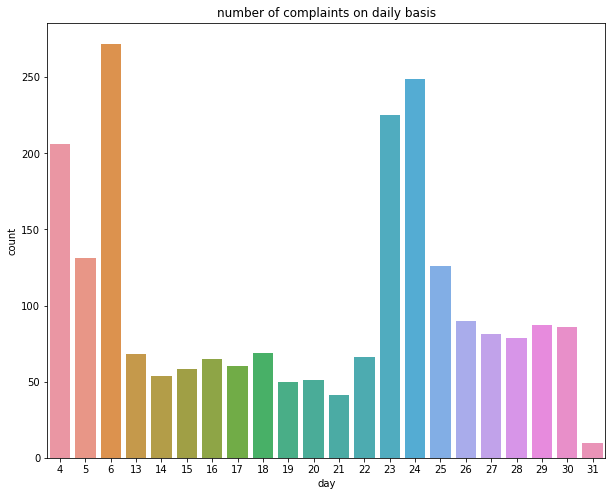

In [14]:
plt.figure(figsize=(10,8))
plot1=sns.countplot(df['day'])
plot1.set(title='number of complaints on daily basis')

(0.0, 31.0)

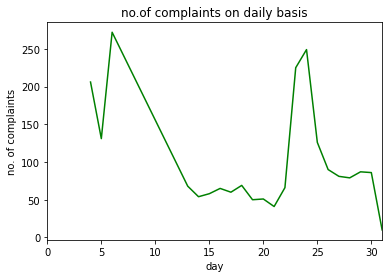

In [34]:
plt.plot(sorted(df['day'].unique()),df.groupby(['day']).size(),color='green',linestyle='-')
plt.xlabel('day')
plt.ylabel('no. of complaints')
plt.title('no.of complaints on daily basis')
plt.xlim(0,31)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'number of complaints on monthly basis')]

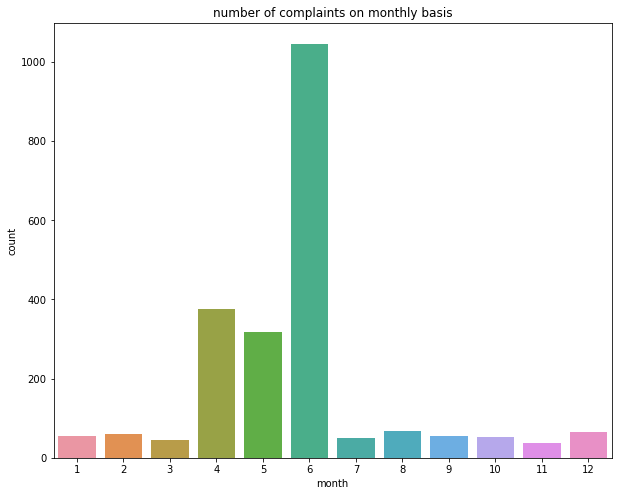

In [16]:
plt.figure(figsize=(10,8))
plot2=sns.countplot(df['month'])
plot2.set(title='number of complaints on monthly basis')

Text(0.5, 1.0, 'number of complaints on monthly basis')

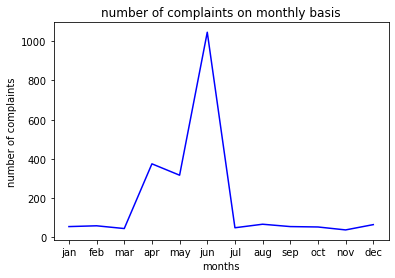

In [19]:
plt.plot(sorted(df['month'].unique()),df.groupby(['month']).size(),color='blue',linestyle='-')
plt.xticks(sorted(df['month'].unique()),['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.xlabel('months')
plt.ylabel('number of complaints')
plt.title('number of complaints on monthly basis')

July month has a large number of complaints

###Provide a table with the frequency of complaint types.

In [27]:
df['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

In [31]:
df["Complaint Catagory"] = np.where(df["Customer Complaint"].str.contains('Internet|Speed|wifi|Access|Throttling|throt|Broadband|Cable|connection|DSL|modem|ip|ISP',case=False,regex=True), 'Internet',
         np.where(df["Customer Complaint"].str.contains('\$|Price|Pricing|Cost|Payment|Charg|pay|Bill|Billing|Rate|Contract|fee',case=False,regex=True), 'Billing',
         np.where(df["Customer Complaint"].str.contains('Service|Cap|usage|Data|Customer|switch|wait|support|TV|avail|network|cramming',case=False,regex=True), 'Network',
         np.where(df["Customer Complaint"].str.contains('Customer|complaint|breach|bully|False|fed up',case=False,regex=True), 'Grievance',
         np.where(df["Customer Complaint"].str.contains('email',case=False,regex=True), 'Email',
         np.where(df["Customer Complaint"].str.contains('outage',case=False,regex=True), 'Outages',
         'Other'))))))


In [41]:
com_cat=df.groupby('Complaint Catagory')['Ticket #'].count().sort_values(ascending=False)
com_cat

Complaint Catagory
Internet     764
Billing      553
Network      442
Other        410
Grievance     42
Email          8
Outages        5
Name: Ticket #, dtype: int64

In [42]:
df.shape

(2224, 15)

In [43]:
percentage_com_cat=df.groupby('Complaint Catagory')['Ticket #'].count().sort_values(ascending=False)/2224*100

In [44]:
pct=pd.DataFrame({'Complaint':com_cat,'complaint%':percentage_com_cat})
pct

,Complaint,complaint%
Complaint Catagory,,
Internet,764,34.352518
Billing,553,24.865108
Network,442,19.874101
Other,410,18.435252
Grievance,42,1.888489
Email,8,0.359712
Outages,5,0.224820


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


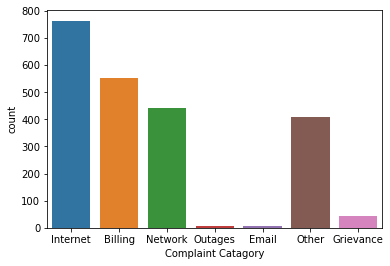

In [45]:
plot3=sns.countplot(df['Complaint Catagory'])


Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [46]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,day,month,year,Complaint Catagory
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,Internet
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,Billing
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015,Internet
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015,Network
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015,Network


In [47]:
df['new status']=df['Status']

In [48]:
df.loc[df['new status']=='Pending','new status']='Open'
df.loc[df['new status']=='Solved','new status']='Closed'

In [50]:
df1=pd.DataFrame(df.groupby('new status')['Ticket #'].count())
df1

,Ticket #
new status,
Closed,1707
Open,517


Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3

In [55]:
state_wise_complaints=df.groupby('State')['new status'].count().sort_values(ascending=False)
state_wise_complaints

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            12
Delaware                 12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

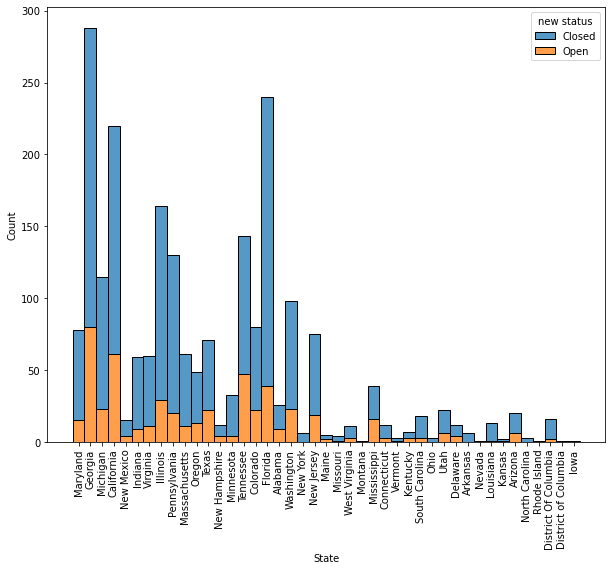

In [58]:
plt.figure(figsize=(10,8))
plot4=sns.histplot(x='State', hue='new status',data=df, stat='count', multiple='stack')
plot4.tick_params(axis='x',rotation=90)

Which state has the maximum complaints

Georgia has the highest number of complaints

Which state has the highest percentage of unresolved complaints

In [68]:
(df[(df['new status']=='Open')].groupby('State')['new status'].count().sort_values(ascending=False))/517*100

State
Georgia                 15.473888
California              11.798839
Tennessee                9.090909
Florida                  7.543520
Illinois                 5.609284
Michigan                 4.448743
Washington               4.448743
Colorado                 4.255319
Texas                    4.255319
Pennsylvania             3.868472
New Jersey               3.675048
Mississippi              3.094778
Maryland                 2.901354
Oregon                   2.514507
Massachusetts            2.127660
Virginia                 2.127660
Alabama                  1.740812
Indiana                  1.740812
Arizona                  1.160542
Utah                     1.160542
Delaware                 0.773694
New Hampshire            0.773694
New Mexico               0.773694
Minnesota                0.773694
South Carolina           0.580271
Connecticut              0.580271
West Virginia            0.580271
Kentucky                 0.580271
District Of Columbia     0.386847
Maine   

Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [69]:
(df[(df['new status']=='Closed')].groupby('Received Via')['new status'].count().sort_values(ascending=False))/1707*100

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: new status, dtype: float64